# Object Detection Code for Railway Track Faults and Breaks

## System Performance Lab, Virginia Tech

## Project overview

**Goal.** Develop a prototype of a **robust, lightweight classifier** that flags a model trains images for break or failure detection as either **OK** or **FAIL**.

**Why start with classification?**
- It’s **fast to iterate** (no bounding boxes to annotate).
- Great for early **feasibility checks**, dataset audits, and **MVP deployment**.
- You can add **detection** later if you need precise localization of failure regions.
- Be aware that you need to connect to a **GPU** setting! Otherwise, you cannot train the model that easily

**Data layout.**
```
data/
├── train/
│   ├── fail/
│   └── ok/     
├── val/
│   ├── fail/
│   └── ok/
└── test/        
    ├── fail/
    └── ok/

model/
├── yolo11n-cls.pt
```

**Organization of Python notebook.**
1. Install the packages
2. Upload the images (or mount google drive)
3. Update the YOLO model
4. Test YOLO model


## 1. Install packages

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.7 MB/s eta 0:00:00


In [2]:
# load these packages
from ultralytics import YOLO
import os
import torch            # for version + CUDA check
import pandas as pd
import numpy as np
from PIL import Image   # only if you preview images
import matplotlib.pyplot as plt  # only if you preview images
import cv2, torch.nn as nn

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## 2. Upload the images to their designated file

It may be handy to create a shared Google Drive with images

In [ ]:
# this is the path where I stored my files
CLS = "/data/"

## 3. Train the model

In [ ]:
# load the YOLO classification model
m = YOLO('/model/yolo11n-cls.pt')
# here we point to where the images are loaded
# we train the model for 30 iterations, in batches of 2, for the classification task
m.train(data = CLS, epochs=50, imgsz=512, batch = 4, task = 'classify', lr0=1e-4)

Ultralytics 8.3.213 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/VV/CLS_DATASET_DIR/, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/drive/MyDrive/VV/yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2d38a33e60>
curves: []
curves_results: []
fitness: 0.7572815418243408
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.5145630836486816, 'metrics/accuracy_top5': 1.0, 'fitness': 0.7572815418243408}
save_dir: PosixPath('/content/runs/classify/train')
speed: {'preprocess': 0.08299520388360196, 'inference': 2.017503757278929, 'loss': 0.0031964466018604793, 'postprocess': 0.003331252428633712}
task: 'classify'
top1: 0.5145630836486816
top5: 1.0

## 4. Testing the YOLO model

In [5]:
# here, we predict for the test set failures the likelihood of being a failure
m.predict(source=os.path.join(CLS,"test/fail/"), imgsz=224, save=True)


image 1/64 /content/drive/MyDrive/VV/CLS_DATASET_DIR/test/fail/IMG_7822.jpeg: 224x224 fail 0.93, ok 0.07, 4.8ms
image 2/64 /content/drive/MyDrive/VV/CLS_DATASET_DIR/test/fail/IMG_7823.jpeg: 224x224 fail 0.95, ok 0.05, 4.9ms
image 3/64 /content/drive/MyDrive/VV/CLS_DATASET_DIR/test/fail/IMG_7824.jpeg: 224x224 fail 0.93, ok 0.07, 4.8ms
image 4/64 /content/drive/MyDrive/VV/CLS_DATASET_DIR/test/fail/IMG_7826.jpeg: 224x224 fail 0.99, ok 0.01, 4.7ms
image 5/64 /content/drive/MyDrive/VV/CLS_DATASET_DIR/test/fail/IMG_7828.jpeg: 224x224 fail 1.00, ok 0.00, 4.9ms
image 6/64 /content/drive/MyDrive/VV/CLS_DATASET_DIR/test/fail/IMG_7831.jpeg: 224x224 fail 1.00, ok 0.00, 5.2ms
image 7/64 /content/drive/MyDrive/VV/CLS_DATASET_DIR/test/fail/IMG_7832.jpeg: 224x224 fail 0.99, ok 0.01, 4.8ms
image 8/64 /content/drive/MyDrive/VV/CLS_DATASET_DIR/test/fail/IMG_7834.jpeg: 224x224 fail 1.00, ok 0.00, 4.8ms
image 9/64 /content/drive/MyDrive/VV/CLS_DATASET_DIR/test/fail/IMG_7836.jpeg: 224x224 fail 1.00, ok 0.0

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'fail', 1: 'ok'}
 obb: None
 orig_img: array([[[127, 122, 113],
         [130, 125, 116],
         [131, 126, 117],
         ...,
         [ 58,  47,  39],
         [ 62,  51,  43],
         [ 61,  50,  42]],
 
        [[128, 123, 114],
         [130, 125, 116],
         [132, 127, 118],
         ...,
         [ 57,  46,  38],
         [ 61,  50,  42],
         [ 61,  50,  42]],
 
        [[127, 122, 113],
         [129, 124, 115],
         [131, 126, 117],
         ...,
         [ 60,  49,  41],
         [ 62,  51,  43],
         [ 62,  51,  43]],
 
        ...,
 
        [[  3,   1,   0],
         [  3,   1,   0],
         [  3,   1,   0],
         ...,
         [176, 171, 168],
         [178, 173, 170],
         [177, 172, 169]],
 
        [[  3,   1,   0],
         [  3,   1,   0],
         [  3,   1,   0],
         ...,
         [171, 164, 161],
         [173, 166, 

In [ ]:
# Save the updated model to a custom directory
# the weights will also be save under runs/train/weights/best.pt
m.save('/model/yolo11n-cls-updated-railway-detection.pt')

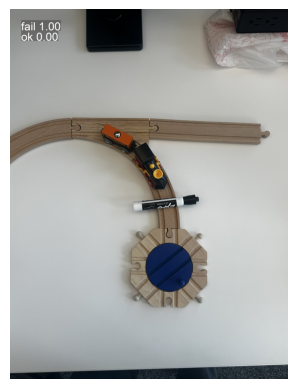

In [ ]:
# here, we plot the likelihood of fail and ok on the pciture itself
# 1) Load your updated model (change the path to your best weights)
#m = YOLO('/path/to/runs_cls/ok_fail/weights/best.pt')

# 2) Pick an image to test
img_path = 'data/test/fail/IMG_7834.jpeg'  # e.g., '/content/drive/MyDrive/VV/dataset_cls/val/ok/img1.jpg'

# 3) Predict
res = m.predict(
    source=img_path,
    imgsz=224,
    device=0 if torch.cuda.is_available() else 'cpu',
    verbose=False
)

# 4) Show the annotated result
annotated = res[0].plot()  # returns a BGR numpy image with the top-1 label/conf drawn on it
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


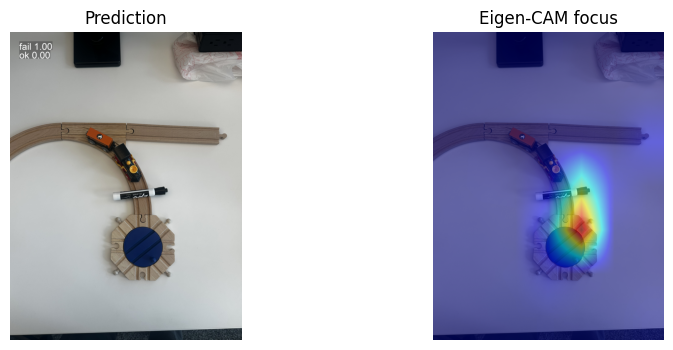

In [ ]:
# --- YOLO (cls) Eigen-CAM: no gradients needed ---
img_path = '/data/test/fail/IMG_7834.jpeg'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
core = m.model.eval().to(device)

# last conv layer
target_layer = next((L for L in reversed(list(core.modules())) if isinstance(L, nn.Conv2d)), None)
assert target_layer is not None, "No Conv2d layer found."

# prep image
bgr = cv2.imread(img_path); H, W = bgr.shape[:2]
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
rgb_res = cv2.resize(rgb, (224, 224), interpolation=cv2.INTER_AREA).astype(np.float32)/255.0
x = torch.from_numpy(rgb_res).permute(2,0,1).unsqueeze(0).to(device)

# hook activations
acts = {}
def fwd_hook(_, __, out): acts['y'] = out.detach()
h = target_layer.register_forward_hook(fwd_hook)

# forward (no grads)
with torch.no_grad():
    res = m.predict(source=img_path, imgsz=224, device=(0 if device=='cuda' else 'cpu'), verbose=False)
    annotated = res[0].plot()  # BGR for left panel
    _ = core(x)  # populate acts['y']

A = acts['y'][0].cpu().numpy()  # [C,h,w]
C, h, w = A.shape
M = A.reshape(C, -1)            # C x (h*w)
# first principal component
U, S, Vt = np.linalg.svd(M, full_matrices=False)
pc1 = U[:, 0:1]                 # C x 1
cam = (M.T @ pc1).reshape(h, w) # (h*w) x 1 -> h x w
cam = np.maximum(cam, 0)
cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
cam = cv2.resize(cam, (W, H))
heat = cv2.applyColorMap((cam * 255).astype(np.uint8), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(bgr, 0.5, heat, 0.5, 0)
#h.remove()

# show
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)); plt.title("Prediction"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(overlay,   cv2.COLOR_BGR2RGB)); plt.title("Eigen-CAM focus"); plt.axis('off')
plt.show()


## Kaggle Connection

Another possibility is to download images from open-source libraries, for which a sample code is provided below.

In [ ]:
import kagglehub, shutil, pathlib
# Download Kaggle dataset
src = kagglehub.dataset_download("salmaneunus/railway-track-fault-detection")
print("Path to dataset files:", src)



100%|██████████| 2.00G/2.00G [01:08<00:00, 31.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salmaneunus/railway-track-fault-detection/versions/2


In [ ]:
# Copy to a stable, writeable location
dst = pathlib.Path(r"railway-track-fault-detection")
shutil.copytree(src, dst, dirs_exist_ok=True)

PosixPath('railway-track-fault-detection')

In [ ]:
# Train (classification task) -> did not work
#model.train(
  #  data="../railway-track-fault-detection/",
 #   epochs=50,
 #  imgsz=224,
 #   batch=64,
 #   task="classify"
#)